### Aditya Kumar Prusty

### Data Science Intern @ Oasis Infobyte

### Task-05

<img src="task5.jpg" style="width:800px;height:400px" />

## Sales Prediction Using Python

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Advertising.csv')

In [12]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 5)

In [14]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

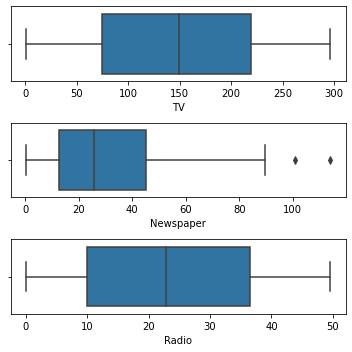

In [18]:
fig, axs  = plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

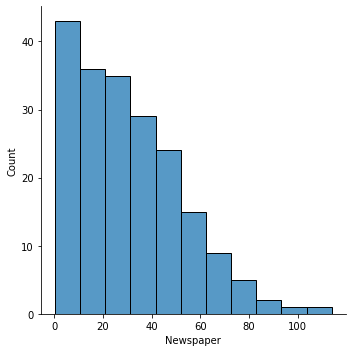

In [19]:
sns.displot(df['Newspaper'])

In [20]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [21]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [22]:
data = df.copy()

In [23]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

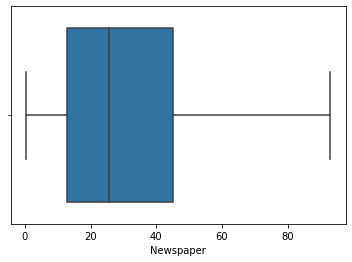

In [24]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

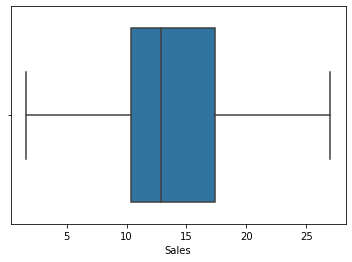

In [25]:
sns.boxplot(data['Sales'])

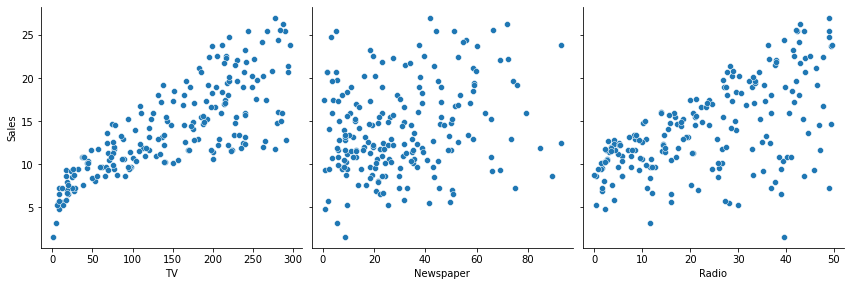

In [27]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

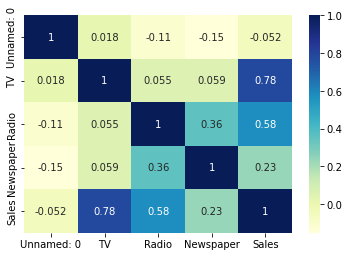

In [28]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [32]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [33]:
print(important_features)

['TV', 'Radio', 'Sales']


In [34]:
x=data['TV']
y=data['Sales']

In [35]:
x=x.values.reshape(-1,1)

In [36]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [37]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [38]:
print(x.shape,y.shape)

(200, 1) (200,)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [40]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [41]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [44]:
knn_train_pred = knn.predict(x_train)

In [45]:
knn_test_pred = knn.predict(x_test)

In [46]:
print(knn_train_pred,knn_test_pred)

[ 9.98 16.38 17.16 11.44 11.02  6.96  9.94  9.92 20.7  21.26 13.88 14.82
 14.3  18.44 16.66  5.96 11.06 21.6   7.7  13.64 11.1  13.74 16.88 17.2
 17.2  18.72 11.44 18.86 10.5  13.56 18.9  15.28 21.6  18.06 13.56 11.44
 16.66  9.92  4.44 11.44  7.7  10.14 15.28 18.72  9.72 11.44  5.96 16.16
 11.1  19.64 15.28 20.4  11.44 19.9  17.2  13.56  9.98 17.86  9.98 18.84
 18.44  6.96  9.98  9.94 16.52 13.64 16.16  8.34 18.88 13.74 18.22 19.68
 11.18 17.86 10.5   7.7  11.06  9.72 18.5  14.78  5.96 18.72 16.1  10.98
 13.74  4.44 20.7  13.38 14.02  9.32  8.8  10.98 18.36  8.34 17.44  8.34
 18.02  7.7  17.16 16.52 21.6  13.96 17.52 18.02 19.74 17.86  9.7  17.2
 11.02 19.74  9.94 14.08  5.26 10.98 19.64 18.72  7.7  11.44 14.2  15.28
 13.74 13.84 20.88 18.22  5.96 13.56 16.9  14.   18.84 11.44 18.36 16.3
  5.96  7.96] [15.28 13.56 19.88 11.44 16.66  9.7  21.26 12.22 17.86 18.5  16.52 18.02
 11.44 10.98  8.34 21.26 18.86 16.52 11.12 13.74 16.88 19.68 14.2  16.2
 16.62  7.96 16.1  11.24 11.02 19.9  12.4

In [47]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [51]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.45152994526780577
RMSE: 3.3746694563162682


In [52]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,variance
0,K-Nearest Neighbors,0.708274,0.45153,3.374669,NaN,0.256744
1,K-Nearest Neighbors,0.708274,0.45153,3.374669,0.256744,NaN


In [53]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [54]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [56]:
print(svr_train_pred,svr_test_pred)

[11.55196202 16.94133072 16.54332984 10.67345062 11.81063056  7.45310111
  8.61661574  9.49099423 19.13061284 18.6433144  13.67787035 13.93823653
 12.90405014 18.3906003  15.81836656  7.28036106 10.17276045 18.88679148
  7.60294017 12.70929835 11.42732169 13.11346273 16.45771998 18.78451373
 18.80307498 18.28786462 10.63610773 17.06337892  8.99290534 12.39441109
 17.65064874 14.50230245 18.95277194 16.31254983 12.36536871 10.67809503
 15.85114407  8.55597535  7.20663498 10.40013589  7.66704387  9.82813252
 14.37023839 18.3028078   9.19727974 10.3204281   7.29331168 15.35851537
 11.41581535 17.54901188 14.31367932 19.24729287 10.29020977 19.13119156
 18.80674985 12.25747874 11.50326564 17.8482898  11.48440038 17.30349511
 18.48425825  7.45649541 11.54076829  8.62768714 18.71117997 12.79952477
 15.47391433  8.06260687 19.21446676 13.15677507 19.29383275 17.47624702
 10.5364969  17.88796591  8.98156526  7.70020345 10.25981538  9.29366801
 18.92088747 12.94090099  7.31481686 18.36169645 15

In [57]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.46727648491769336
RMSE: 3.3258734024366787


In [58]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,variance
0,K-Nearest Neighbors,0.708274,0.451530,3.374669,NaN,0.256744
1,K-Nearest Neighbors,0.708274,0.451530,3.374669,0.256744,NaN
2,K-Nearest Neighbors,0.645201,0.467276,3.325873,0.177924,NaN


In [59]:
import statsmodels.api as sm

In [60]:
x_train_constant = sm.add_constant(x_train)

In [62]:
model = sm.OLS(y_train,x_train_constant).fit()

In [63]:
model.params

const    6.558762
x1       0.051393
dtype: float64

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     262.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.49e-33
Time:                        10:56:51   Log-Likelihood:                -344.94
No. Observations:                 134   AIC:                             693.9
Df Residuals:                     132   BIC:                             699.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5588      0.529     12.395      0.0

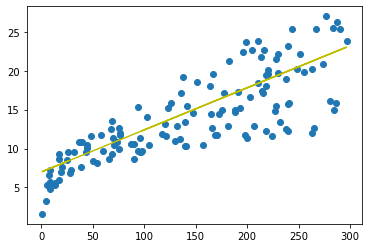

In [65]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 *x_train,'y')
plt.show()

In [67]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

13    -1.869594
185    5.505641
55     6.919140
86     1.519940
143   -1.534486
         ...   
115    2.181612
92     1.652948
85    -1.287919
132   -1.290464
44     0.651270
Name: Sales, Length: 134, dtype: float64

In [68]:
y_train_pred

array([11.56959447, 17.09435851, 16.78086027, 10.48005961, 11.93448586,
        7.23201228,  8.51170181,  9.3082957 , 19.45330427, 21.79169278,
       14.34482478, 14.60692986, 13.46086253, 18.38432667, 16.21553558,
        6.93393199,  9.95584944, 21.44735864,  7.44272421, 13.20903608,
       11.39999706, 13.7178283 , 16.71404917, 18.85714369, 18.88284027,
       18.27640105, 10.43894508, 17.1920055 ,  8.85603594, 12.77733358,
       17.68024046, 15.13114003, 21.33943302, 16.60098423, 12.73621906,
       10.48519892, 16.24123216,  8.45516934,  6.7694739 , 10.18711863,
        7.52495326,  9.62179394, 15.01293578, 18.291819  ,  9.0410513 ,
       10.10488958,  6.95962857, 15.85064419, 11.38457911, 17.5928721 ,
       14.96154262, 20.62506818, 10.07405369, 20.98482026, 18.88797958,
       12.5820396 , 11.50278337, 17.85497719, 11.47708679, 17.38729949,
       18.48711298,  7.2371516 , 11.55417652,  8.52198044, 18.7594967 ,
       13.32724033, 15.94315186,  7.9720737 , 19.68457347, 13.76

<Figure size 432x288 with 0 Axes>

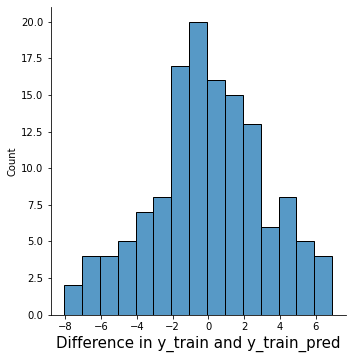

In [69]:
fig = plt.figure()
sns.displot(res,bins = 15)
fig.suptitle('Error Terms',fontsize =15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize = 15)
plt.show()

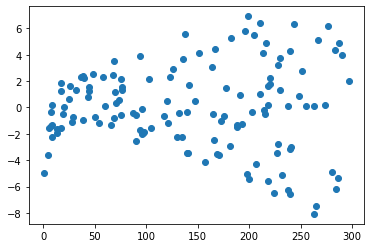

In [70]:
plt.scatter(x_train,res)
plt.show()

In [71]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [72]:
y_pred

array([14.95126399, 12.52036782, 17.33076702, 10.42866645, 16.21039626,
        8.7738069 , 21.4987518 , 12.20173026, 17.88067377, 18.98048726,
       18.61045655, 19.98779307, 10.48519892, 10.96315525,  7.93609849,
       21.64779194, 17.18686619, 18.80061122, 12.07838669, 13.71268899,
       16.71404917, 17.526061  , 15.5885391 , 16.06135612, 18.16333611,
        7.78191903, 15.6553502 ,  9.76055545, 11.71863461, 21.02079547,
       12.36104904,  7.47869942, 20.77924764, 10.68049291, 19.60234442,
       17.70079773, 14.2523171 , 11.09677745, 12.2479841 , 13.29640444,
        7.51981394, 12.20173026,  9.44705721, 10.5777066 , 16.7911389 ,
       17.04810467, 19.34537865, 20.95912368, 17.98859939, 13.55850952,
       16.06135612, 18.89825821,  9.99696396,  7.84359081, 14.25745642,
       15.36240922, 10.39783056, 21.61181674,  7.16006187, 16.82711411,
       16.51361587,  7.55578915, 17.98859939, 20.20878364, 13.90284365,
       12.75163701])

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.427528864127519

In [74]:
r2 = r2_score(y_test,y_pred)
r2

0.4342133692932175

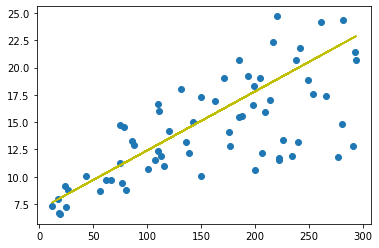

In [75]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9995 + 0.0541 * x_test,'y')
plt.show()